In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures,OneHotEncoder,LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn import metrics


## Import Data

In [47]:
#load train_cleaned.csv
train = pd.read_csv('../datasets/train_cleaned_preprocessed.csv')
train.head()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_cars garage_area,garage_cars exter_qual_TA,garage_cars foundation_PConc,garage_cars kitchen_qual_TA,garage_area exter_qual_TA,garage_area foundation_PConc,garage_area kitchen_qual_TA,exter_qual_TA foundation_PConc,exter_qual_TA kitchen_qual_TA,foundation_PConc kitchen_qual_TA
0,69.0552,13517,6,8,1976,2005,289.0000,533.0000,0.0000,192.0000,...,950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,43.0000,11492,7,5,1996,1997,132.0000,637.0000,0.0000,276.0000,...,1118.0000,0.0000,2.0000,0.0000,0.0000,559.0000,0.0000,0.0000,0.0000,0.0000
2,68.0000,7922,5,7,1953,2007,0.0000,731.0000,0.0000,326.0000,...,246.0000,1.0000,0.0000,0.0000,246.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,73.0000,9802,5,5,2006,2007,0.0000,0.0000,0.0000,384.0000,...,800.0000,2.0000,2.0000,2.0000,400.0000,400.0000,400.0000,1.0000,1.0000,1.0000
4,82.0000,14235,6,8,1900,1993,0.0000,0.0000,0.0000,676.0000,...,968.0000,2.0000,2.0000,2.0000,484.0000,484.0000,484.0000,1.0000,1.0000,1.0000


In [48]:
test = pd.read_csv('../datasets/test_cleaned_preprocessed.csv')
test.head()

,id,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_cars garage_area,garage_cars exter_qual_TA,garage_cars foundation_PConc,garage_cars kitchen_qual_TA,garage_area exter_qual_TA,garage_area foundation_PConc,garage_area kitchen_qual_TA,exter_qual_TA foundation_PConc,exter_qual_TA kitchen_qual_TA,foundation_PConc kitchen_qual_TA
0,2658,69.0000,9142,6,8,1910,1950,0.0000,0,0,...,440.0000,1.0000,0.0000,0.0000,440.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2718,69.0552,9662,5,4,1977,1977,0.0000,0,0,...,1160.0000,2.0000,0.0000,2.0000,580.0000,0.0000,580.0000,0.0000,1.0000,0.0000
2,2414,58.0000,17104,7,5,2006,2006,0.0000,554,0,...,852.0000,0.0000,2.0000,0.0000,0.0000,426.0000,0.0000,0.0000,0.0000,0.0000
3,1989,60.0000,8520,5,6,1923,2006,0.0000,0,0,...,960.0000,0.0000,0.0000,2.0000,0.0000,0.0000,480.0000,0.0000,0.0000,0.0000
4,625,69.0552,9500,6,5,1963,1963,247.0000,609,0,...,1028.0000,2.0000,0.0000,2.0000,514.0000,0.0000,514.0000,0.0000,1.0000,0.0000


## 0:Baseline model, saleprice_mean

In [49]:
#create submit dataframe, get ID from test and assign Saleprice as mean
submit = test[['id']].rename(columns={'id':'Id'})
submit['SalePrice'] = train['saleprice'].mean()
submit.head()

,Id,SalePrice
0,2658,181358.7281
1,2718,181358.7281
2,2414,181358.7281
3,1989,181358.7281
4,625,181358.7281


In [50]:
#write submit to csv
submit.to_csv('../Model/0_baseline_model.csv',index=False)

## 1: All features model

In [51]:
## 
features1 = [col for col in train.columns if col!='saleprice']
X = train[features1]
y = train['saleprice']


In [52]:
#standardize
ss = StandardScaler()
ss.fit(X)
X_scale = ss.transform(X)

In [53]:
#Generate LinearRegression Model
lr = LinearRegression()
lr.fit(X_scale,y)
lr.score(X_scale,y)

0.9568021339524264

In [54]:
np.sqrt(metrics.mean_squared_error(y,lr.predict(X_scale)))

16474.905601558727

In [55]:
lr_cv_score = cross_val_score(lr,X_scale,y).mean() #very bad performance on unseen data
lr_cv_score

-1.0802777287766038e+24

In [56]:
lr_cv_rmse = np.abs(cross_val_score(lr,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
lr_cv_rmse

5.2644784812583176e+16

This model is over fit. Now try to use Ridge,Lasso,ElasticNet

**Ridge**

In [57]:
ridgecv = RidgeCV(alphas=np.logspace(0,5,200))
ridgecv.fit(X_scale,y)
ridgecv.score(X_scale,y)

0.9527469404136027

In [58]:
ridgecv.alpha_

136.67163564620074

In [59]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_scale,y)
ridge.score(X_scale,y)

0.9527469404136014

In [60]:
ridge_cv_score = cross_val_score(ridge,X_scale,y).mean() #much better performance
ridge_cv_score

0.9306425358684954

In [61]:
ridge_cv_rmse = np.abs(cross_val_score(ridge,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
ridge_cv_rmse

20784.317912777904

**Lasso**

In [62]:
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X_scale,y)
lassocv.score(X_scale,y)

0.9519326195536462

In [63]:
lassocv_optimal_alpha = lassocv.alpha_
lassocv_optimal_alpha

182.9101588799186

In [64]:
lasso = Lasso(alpha=lassocv_optimal_alpha)
lasso.fit(X_scale,y)
lasso.score(X_scale,y)

0.9519326195536462

In [65]:
lasso_cv_score = cross_val_score(lasso,X_scale,y).mean()
lasso_cv_score

0.9330282369758436

In [66]:
lasso_cv_rmse = np.abs(cross_val_score(lasso,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
lasso_cv_rmse

20411.074262132075

**ElasticNet**

In [67]:
encv = ElasticNetCV(n_alphas=100,l1_ratio=np.linspace(0.1,1,20))
encv.fit(X_scale,y)
encv.score(X_scale,y)

0.951916131871083

In [68]:
encv_optimal_alpha = encv.alpha_
encv_optimal_alpha

183.81023845540972

In [69]:
encv_optimal_l1_ratio = encv.l1_ratio_ #same as lasso
encv_optimal_l1_ratio

1.0

In [70]:
en = ElasticNet(alpha=encv_optimal_alpha,l1_ratio=encv_optimal_l1_ratio)
en.fit(X_scale,y)
en.score(X_scale,y)

0.951916131871083

In [71]:
elasticnet_cv_score = cross_val_score(en,X_scale,y).mean()
elasticnet_cv_score

0.9330300778469194

In [72]:
elasticnet_cv_rmse = np.abs(cross_val_score(en,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
elasticnet_cv_rmse

20410.86462984643

### Report Results

In [73]:
print(f"""     
     LinearRegression
     Estimated R2 Score on unseen data: {round(lr_cv_score,4)}
     Estimated RMSE on unseen data: {round(lr_cv_rmse,4)}
          
     Ridge
     Estimated R2 Score on unseen data: {round(ridge_cv_score,4)}
     Estimated RMSE on unseen data: {round(ridge_cv_rmse,4)}

     Lasso
     Estimated R2 Score on unseen data: {round(lasso_cv_score,4)}
     Estimated RMSE on unseen data: {round(lasso_cv_rmse,4)}   

     ElasticNet
     Opimal l1 ration: {encv_optimal_l1_ratio}
     Estimated R2 Score on unseen data: {round(elasticnet_cv_score,4)}
     Estimated RMSE on unseen data: {round(elasticnet_cv_rmse,4)}         
        """)

     
     LinearRegression
     Estimated R2 Score on unseen data: -1.0802777287766039e+24
     Estimated RMSE on unseen data: 5.2644784812583176e+16
          
     Ridge
     Estimated R2 Score on unseen data: 0.9306
     Estimated RMSE on unseen data: 20784.3179

     Lasso
     Estimated R2 Score on unseen data: 0.933
     Estimated RMSE on unseen data: 20411.0743   

     ElasticNet
     Opimal l1 ration: 1.0
     Estimated R2 Score on unseen data: 0.933
     Estimated RMSE on unseen data: 20410.8646         
        


## Apply to test data

In [74]:
#select subset of test data
X_test = test[features1]
#standardize
X_test_scale = ss.transform(X_test)
#predict and assign to saleprice column
submit['SalePrice'] = en.predict(X_test_scale)

In [75]:
submit.head()

,Id,SalePrice
0,2658,134869.9732
1,2718,149719.0909
2,2414,212586.7264
3,1989,100628.4045
4,625,169036.0569


In [76]:
#Print csv file
submit.to_csv('../Model/1_all_features_elasticnet.csv',index=False)

## Write function for all model and report

In [77]:
def all_model_fit_report(feature):
    '''When users input the feature list, instantiate the following model
    
    1.LinearRegression 
    2.RidgeCV
    3.Ridge using alpha_ from RidgeCV
    4.LassoCV
    5.Lasso using alpha_ from LassoCV
    6.ElasticNetCV
    7.ElasticNet using alpha_ and l1_ratio_ from Elasticnet CV
    
    and print report and return name of best model based on RMSE of cross_val_score 
    '''
    # Create X,y
    X = train[feature]
    y = train['saleprice']
    # Standardize
    ss = StandardScaler()
    ss.fit(X)
    X_scale = ss.transform(X)
    
    # LinearRegression
    lr = LinearRegression()
    lr.fit(X_scale,y)
    lr_score = lr.score(X_scale,y)
    lr_rmse = np.sqrt(metrics.mean_squared_error(y,lr.predict(X_scale)))
    lr_cv_score = cross_val_score(lr,X_scale,y).mean()
    lr_cv_rmse = np.abs(cross_val_score(lr,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
    
    # RidgeCV
    ridgecv = RidgeCV(alphas=np.logspace(0,5,200))
    ridgecv.fit(X_scale,y)
    # Ridge
    ridge = Ridge(alpha=ridgecv.alpha_)
    ridge.fit(X_scale,y)
    ridge_score = ridge.score(X_scale,y)
    ridge_rmse = np.sqrt(metrics.mean_squared_error(y,ridge.predict(X_scale)))
    ridge_cv_score = cross_val_score(ridge,X_scale,y).mean()
    ridge_cv_rmse = np.abs(cross_val_score(ridge,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
    
    #LassoCV
    lassocv = LassoCV(n_alphas=200)
    lassocv.fit(X_scale,y)
    #Lasso
    lasso = Lasso(alpha=lassocv.alpha_)
    lasso.fit(X_scale,y)
    lasso_score = lasso.score(X_scale,y)
    lasso_rmse = np.sqrt(metrics.mean_squared_error(y,lasso.predict(X_scale)))
    lasso_cv_score = cross_val_score(lasso,X_scale,y).mean()
    lasso_cv_rmse = np.abs(cross_val_score(lasso,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
    
    #ElasticNetCV
    encv = ElasticNetCV(n_alphas=100,l1_ratio=np.linspace(0.1,1,20))
    encv.fit(X_scale,y)
    #ElasticNet
    en = ElasticNet(alpha=encv.alpha_,l1_ratio=encv.l1_ratio_)
    en.fit(X_scale,y)
    en_score = en.score(X_scale,y)
    en_rmse = np.sqrt(metrics.mean_squared_error(y,en.predict(X_scale)))
    elasticnet_cv_score = cross_val_score(en,X_scale,y).mean()
    elasticnet_cv_rmse = np.abs(cross_val_score(en,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
    
    #Print Result
    print(f"""     
         LinearRegression
         R2 Score on training data: {round(lr_score,4)}
         RMSE on training data :{round(lr_rmse,4)}
         Estimated R2 Score on unseen data: {round(lr_cv_score,4)}
         Estimated RMSE on unseen data: {round(lr_cv_rmse,4)}

         Ridge
         R2 Score on training data: {round(ridge_score,4)}
         RMSE on training data :{round(ridge_rmse,4)}
         Estimated R2 Score on unseen data: {round(ridge_cv_score,4)}
         Estimated RMSE on unseen data: {round(ridge_cv_rmse,4)}

         Lasso
         R2 Score on training data: {round(lasso_score,4)}
         RMSE on training data :{round(lasso_rmse,4)}
         Estimated R2 Score on unseen data: {round(lasso_cv_score,4)}
         Estimated RMSE on unseen data: {round(lasso_cv_rmse,4)}   

         ElasticNet
         Opimal l1 ration: {encv_optimal_l1_ratio}
         R2 Score on training data: {round(en_score,4)}
         RMSE on test training :{round(en_rmse,4)}
         Estimated R2 Score on unseen data: {round(elasticnet_cv_score,4)}
         Estimated RMSE on unseen data: {round(elasticnet_cv_rmse,4)}         
        """)
    
    all_model = { "Model":['LinearRegression','Ridge','Lasso','ElasticNet'],
                 "cv_rmse":[lr_cv_rmse,ridge_cv_rmse,lasso_cv_rmse,elasticnet_cv_rmse],
                 "cv_score" :[lr_cv_score,ridge_cv_score,lasso_cv_score,elasticnet_cv_score]
                }
    pd.options.display.float_format = '{:.4f}'.format
    df = pd.DataFrame(all_model)
    best_model = df.sort_values('cv_rmse')['Model'].reset_index(drop=True)[0]
    return best_model

In [78]:
#test on function
all_model_fit_report(features1)

     
         LinearRegression
         R2 Score on training data: 0.9568
         RMSE on training data :16474.9056
         Estimated R2 Score on unseen data: -1.0802777287766039e+24
         Estimated RMSE on unseen data: 5.2644784812583176e+16

         Ridge
         R2 Score on training data: 0.9527
         RMSE on training data :17230.8521
         Estimated R2 Score on unseen data: 0.9306
         Estimated RMSE on unseen data: 20784.3179

         Lasso
         R2 Score on training data: 0.9519
         RMSE on training data :17378.6892
         Estimated R2 Score on unseen data: 0.933
         Estimated RMSE on unseen data: 20411.0743   

         ElasticNet
         Opimal l1 ration: 1.0
         R2 Score on training data: 0.9519
         RMSE on test training :17381.6695
         Estimated R2 Score on unseen data: 0.933
         Estimated RMSE on unseen data: 20410.8646         
        


'ElasticNet'

## 2: All numeric model

In [79]:
## import cleaned data to get original columns name
data = pd.read_csv('../datasets/train_cleaned.csv')
data.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_cars', 'garage

In [80]:
categorical_columns = [col for col in data.dtypes[data.dtypes == 'object'].index]
categorical_columns.append('ms_subclass')

In [81]:
categorical_columns

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type',
 'ms_subclass']

In [82]:
numerical_columns = [col for col in data.columns if col not in categorical_columns if col!='saleprice']
numerical_columns

['lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'age_garage']

In [83]:
features2 = numerical_columns
all_model_fit_report(features2)

     
         LinearRegression
         R2 Score on training data: 0.8761
         RMSE on training data :27906.2026
         Estimated R2 Score on unseen data: 0.8696
         Estimated RMSE on unseen data: 28552.85

         Ridge
         R2 Score on training data: 0.876
         RMSE on training data :27916.9067
         Estimated R2 Score on unseen data: 0.8698
         Estimated RMSE on unseen data: 28525.4217

         Lasso
         R2 Score on training data: 0.8752
         RMSE on training data :28002.2594
         Estimated R2 Score on unseen data: 0.8703
         Estimated RMSE on unseen data: 28472.2809   

         ElasticNet
         Opimal l1 ration: 1.0
         R2 Score on training data: 0.8752
         RMSE on test training :27998.9578
         Estimated R2 Score on unseen data: 0.8703
         Estimated RMSE on unseen data: 28472.3848         
        


'Lasso'

In [84]:
# Create X,y
X = train[features2]
y = train['saleprice']
# Standardize
ss = StandardScaler()
ss.fit(X)
X_scale = ss.transform(X)

In [85]:
#LassoCV
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X_scale,y)
#Lasso
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_scale,y)
lasso_cv_score = cross_val_score(lasso,X_scale,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X_scale,y,scoring='neg_root_mean_squared_error')).mean()

In [86]:
lasso_cv_rmse

28472.280888586283

In [87]:
#select subset of test data
X_test = test[features2]
#standardize
X_test_scale = ss.transform(X_test)
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test_scale)

In [88]:
submit.head()

,Id,SalePrice
0,2658,143138.6916
1,2718,161881.2238
2,2414,206265.7776
3,1989,108688.5092
4,625,189744.0121


In [89]:
#Print csv file
submit.to_csv('../Model/2_all_numerical_lasso.csv',index=False)

## 3: Subset selection using backward elimination

In [90]:
import statsmodels.api as sm

In [91]:
cols = features1
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index=cols)
    pmax = max(p)
    features_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(features_with_p_max)
    else:
        break
features4 = cols

In [92]:
len(features4)

116

In [93]:
all_model_fit_report(features4)

C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8288910959.239258, tolerance: 1284922365.6218832
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8288910959.239258, tolerance: 1284922365.6218832
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167247886.1622925, tolerance: 1026129769.6003649
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: O

     
         LinearRegression
         R2 Score on training data: 0.9549
         RMSE on training data :16838.8129
         Estimated R2 Score on unseen data: -1.9767161753301674e+23
         Estimated RMSE on unseen data: 1.5787514309143082e+16

         Ridge
         R2 Score on training data: 0.9529
         RMSE on training data :17202.1877
         Estimated R2 Score on unseen data: 0.9413
         Estimated RMSE on unseen data: 19124.9643

         Lasso
         R2 Score on training data: 0.9501
         RMSE on training data :17701.7093
         Estimated R2 Score on unseen data: 0.9397
         Estimated RMSE on unseen data: 19401.5607   

         ElasticNet
         Opimal l1 ration: 1.0
         R2 Score on training data: 0.9501
         RMSE on test training :17701.7093
         Estimated R2 Score on unseen data: 0.9397
         Estimated RMSE on unseen data: 19401.5607         
        


C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12306857463.585205, tolerance: 999199388.8676754
  model = cd_fast.enet_coordinate_descent(


'Ridge'

In [94]:
# Create X,y
X = train[features4]
y = train['saleprice']
# Standardize
ss = StandardScaler()
ss.fit(X)
X_scale = ss.transform(X)

In [95]:
# RidgeCV
ridgecv = RidgeCV(alphas=np.logspace(0,5,200))
ridgecv.fit(X_scale,y)
# Ridge
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_scale,y)
ridge_cv_score = cross_val_score(ridge,X_scale,y).mean()
ridge_cv_rmse = np.abs(cross_val_score(ridge,X_scale,y,scoring='neg_root_mean_squared_error')).mean()

In [96]:
ridge_cv_rmse

19124.9642866445

In [97]:
#select subset of test data
X_test = test[features4]
#standardize
X_test_scale = ss.transform(X_test)
#predict and assign to saleprice column
submit['SalePrice'] = ridge.predict(X_test_scale)

In [98]:
submit.head()

,Id,SalePrice
0,2658,96232.1883
1,2718,146992.2354
2,2414,211402.6808
3,1989,160284.3521
4,625,169958.6091


In [99]:
#Print csv file
submit.to_csv('../Model/4_backward_elimination_ridge.csv',index=False)

In [100]:
#LassoCV
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X_scale,y)
#Lasso
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_scale,y)
lasso_cv_score = cross_val_score(lasso,X_scale,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X_scale,y,scoring='neg_root_mean_squared_error')).mean()

C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8288910959.239258, tolerance: 1284922365.6218832
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8288910959.239258, tolerance: 1284922365.6218832
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167247886.1622925, tolerance: 1026129769.6003649
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: O

In [101]:
lasso_cv_rmse

19401.560682282616

In [102]:
#select subset of test data
X_test = test[features4]
#standardize
X_test_scale = ss.transform(X_test)
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test_scale)

In [103]:
submit.head()

,Id,SalePrice
0,2658,111051.4707
1,2718,146884.8605
2,2414,213152.3634
3,1989,103309.8885
4,625,169350.5233


In [104]:
#Print csv file
submit.to_csv('../Model/4_backward_elimination_lasso.csv',index=False)

## Select best score with lasso model and investigate its coefficient

In [142]:
# Select feature1 + elasticnet
features1 = [col for col in train.columns if col!='saleprice']
X = train[features1]
y = train['saleprice']
#standardize
ss = StandardScaler()
ss.fit(X)
X_scale = ss.transform(X)
#LassoCV
lassocv = LassoCV(n_alphas=200)
lassocv.fit(X_scale,y)
#Lasso
lasso = Lasso(alpha=5000)
lasso.fit(X_scale,y)
lasso_cv_score = cross_val_score(lasso,X_scale,y).mean()
lasso_cv_rmse = np.abs(cross_val_score(lasso,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
#select subset of test data
X_test = test[features1]
#standardize
X_test_scale = ss.transform(X_test)
#predict and assign to saleprice column
submit['SalePrice'] = lasso.predict(X_test_scale)
lasso_cv_rmse

25970.2216021777

In [144]:
coef = pd.Series(lasso.coef_,index=features1)

In [145]:
coef[coef!=0].count()

17

In [146]:
coef[coef!=0].sort_values()

gr_liv_area kitchen_qual_TA      -483.3223
gr_liv_area garage_cars             6.0101
year_remod/add                    119.1905
fireplace_qu_Gd                   308.3395
fireplaces                       1030.4506
bsmt_exposure_Gd                 1725.9083
sale_type_New                    1829.4709
gr_liv_area foundation_PConc     1939.1290
gr_liv_area garage_area          2071.0510
lot_area                         3135.0172
overall_qual 1st_flr_sf          4094.3320
mas_vnr_area foundation_PConc    4398.0555
year_built year_remod/add        6219.0572
bsmtfin_sf_1                     6584.1520
overall_qual garage_area         7705.3280
overall_qual total_bsmt_sf      13477.5129
overall_qual gr_liv_area        32760.7158
dtype: float64

<AxesSubplot:>

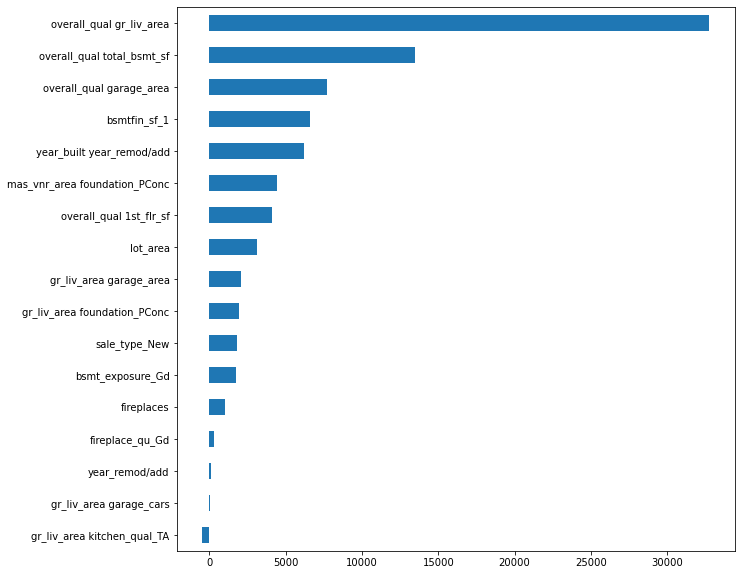

In [147]:
coef[coef!=0].sort_values().plot(kind='barh',figsize=(10,10))

In [148]:
features5 = [col for col in coef[coef!=0].index]

In [149]:
all_model_fit_report(features5)

     
         LinearRegression
         R2 Score on training data: 0.9118
         RMSE on training data :23542.49
         Estimated R2 Score on unseen data: 0.9086
         Estimated RMSE on unseen data: 23903.7268

         Ridge
         R2 Score on training data: 0.9117
         RMSE on training data :23548.3172
         Estimated R2 Score on unseen data: 0.9087
         Estimated RMSE on unseen data: 23883.6709

         Lasso
         R2 Score on training data: 0.9118
         RMSE on training data :23544.498
         Estimated R2 Score on unseen data: 0.9087
         Estimated RMSE on unseen data: 23886.2922   

         ElasticNet
         Opimal l1 ration: 1.0
         R2 Score on training data: 0.9118
         RMSE on test training :23544.5485
         Estimated R2 Score on unseen data: 0.9087
         Estimated RMSE on unseen data: 23886.2932         
        


'Ridge'

In [110]:
X = train[features5]
y = train['saleprice']
#standardize
ss = StandardScaler()
ss.fit(X)
X_scale = ss.transform(X)
# RidgeCV
ridgecv = RidgeCV(alphas=np.logspace(0,5,200))
ridgecv.fit(X_scale,y)
# Ridge
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_scale,y)
ridge_cv_score = cross_val_score(ridge,X_scale,y).mean()
ridge_cv_rmse = np.abs(cross_val_score(ridge,X_scale,y,scoring='neg_root_mean_squared_error')).mean()
#select subset of test data
X_test = test[features5]
#standardize
X_test_scale = ss.transform(X_test)
#predict and assign to saleprice column
submit['SalePrice'] = ridge.predict(X_test_scale)
ridge_cv_rmse

23883.670934972695

In [113]:
#Print csv file
submit.to_csv('../Model/5_lasso_ridge_a5000.csv',index=False)